# Closeness centrality ke 2

**Kita cek terlebih dahulu website tersebut bisa kita crawling apa tidak **

In [18]:
import requests

url = "https://www.jpnn.com/"
response = requests.get(url)

# Periksa status code
if response.status_code == 200:
    print("Halaman berhasil diakses.")
elif response.status_code == 404:
    print("Halaman tidak ditemukan.")
else:
    print(f"Terjadi kesalahan. Status code: {response.status_code}")


Halaman berhasil diakses.


## Langkah 1: Crawl data judul berita dan isi berita dari https://jpnn.com/

## Politik

In [4]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import date, timedelta

def get_article_content(article_url):
    response = requests.get(article_url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        article_content = soup.find('div', itemprop="articleBody").find_all('p')
        content = '\n'.join([p.get_text() for p in article_content])
        return content
    return ""

def scrape_news_data(start_date, end_date):
    base_url = "https://www.jpnn.com/indeks?id=248&d={day}&m={month}&y={year}&tab=all"
    data = []

    current_date = start_date
    while current_date <= end_date:
        url = base_url.format(day=current_date.day, month=current_date.month, year=current_date.year)
        response = requests.get(url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            news_elements = soup.find('div', class_="content").find_all('h1')

            for element in news_elements:
                title = element.a.text
                article_url = element.a['href']
                content = get_article_content(article_url)

                data.append({'Date': current_date.strftime('%d-%m-%Y'), 'Title': title, 'Content': content})

            current_date += timedelta(days=1)
        else:
            print(f"Failed to fetch data for {current_date.strftime('%d-%m-%Y')}")

    return data

from datetime import date, timedelta
start_date = date(2023, 10, 1)
end_date = date(2023, 11, 1)

news_data = scrape_news_data(start_date, end_date)


In [5]:
# Create a pandas DataFrame from the scraped data
df = pd.DataFrame(news_data)

In [6]:
df['Title'] = df['Title'].str.replace('\n', '')

In [7]:
df['Label'] = 'politik'


In [8]:
df

,Date,Title,Content,Label
0,01-10-2023,Megawati Ungkap Orang Luar Tak Bisa Langsung J...,"jpnn.com, JAKARTA - Ketua Umum PDI Perjuangan ...",politik
1,01-10-2023,"Peringati Hari Kesaktian Pancasila, KawanJuang...","jpnn.com, PURWAKARTA - Para sukarelawan penduk...",politik
2,01-10-2023,"Ganjar dan Anies Hadiri Acara IdeaFest, di Man...","jpnn.com, JAKARTA - Ketiga bacapres Ganjar Pra...",politik
3,01-10-2023,"Silaturahmi ke Rembang, Anies Diberi Tongkat K...","jpnn.com, JAKARTA - Anies Baswedan mengunjungi...",politik
4,01-10-2023,"Survei Erick Thohir Teratas di Jatim, Pengamat...","jpnn.com, JAKARTA - Nama Erick Thohir punya ke...",politik
...,...,...,...,...
635,01-11-2023,Ribuan Warga Aceh Berzikir & Selawat Bersama A...,"jpnn.com, ACEH UTARA - Puluhan ribu rakyat Ace...",politik
636,01-11-2023,Mendagri Tito Karnavian Dorong Polri Aktif Awa...,"jpnn.com, JAKARTA - Menteri Dalam Negeri (Men...",politik
637,01-11-2023,"PKPU Nomor 19 Sudah Direvisi, tetapi Gibran Be...",jpnn.com - JAKARTA - Komisi II DPR RI dan peme...,politik
638,01-11-2023,Survei: Masyarakat Jateng Mulai Masif Mendukun...,jpnn.com - JAKARTA - Hasil survei terbaru Poll...,politik


In [9]:
# Save the DataFrame to a CSV file
df.to_csv('jnn_politik_news.csv', index=False)

## Ekonomi

In [10]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import date, timedelta

def get_article_content(article_url):
    response = requests.get(article_url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        article_content = soup.find('div', itemprop="articleBody").find_all('p')
        content = '\n'.join([p.get_text() for p in article_content])
        return content
    return ""

def scrape_news_data(start_date, end_date):
    base_url = "https://www.jpnn.com/indeks?id=216&d=01&m=10&y=2023&tab=all"
    data = []

    current_date = start_date
    while current_date <= end_date:
        url = base_url.format(day=current_date.day, month=current_date.month, year=current_date.year)
        response = requests.get(url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            news_elements = soup.find('div', class_="content").find_all('h1')

            for element in news_elements:
                title = element.a.text
                article_url = element.a['href']
                content = get_article_content(article_url)

                data.append({'Date': current_date.strftime('%d-%m-%Y'), 'Title': title, 'Content': content})

            current_date += timedelta(days=1)
        else:
            print(f"Failed to fetch data for {current_date.strftime('%d-%m-%Y')}")

    return data

from datetime import date, timedelta
start_date = date(2023, 10, 1)
end_date = date(2023, 11, 1)

news_data = scrape_news_data(start_date, end_date)


In [12]:
# Create a pandas DataFrame from the scraped data
df2 = pd.DataFrame(news_data)

# Save the DataFrame to a CSV file
df2.to_csv('jpnn_ekonomi_news.csv', index=False)

In [13]:
df2['Title'] = df2['Title'].str.replace('\t', '')
df2['Content'] = df2['Content'].str.replace('\n', '')

In [14]:
df2['Label'] = 'Ekonomi'

In [15]:
df2['Title'] = df2['Title'].str.replace('\n', '')
df2

,Date,Title,Content,Label
0,01-10-2023,Erick Thohir Mengaku Jatuh Cinta pada Program ...,"jpnn.com, JAKARTA - Menteri Badan Usaha Milik ...",Ekonomi
1,01-10-2023,Menteri Bahlil Pastikan Investasi Rempang Berd...,"jpnn.com, JAKARTA - Menteri Investasi/Kepala B...",Ekonomi
2,01-10-2023,"Gandeng LKPP, Pertamina Implementasikan Aplika...","jpnn.com, JAKARTA - PT Pertamina (Persero) men...",Ekonomi
3,01-10-2023,"Kini Fokus Jadi Entrepreneur, Zahra Amalina Me...","jpnn.com, JAKARTA - Model sekaligus pemain sin...",Ekonomi
4,01-10-2023,"Terapkan ESG, OCS Group Gandeng World Cleanup ...","jpnn.com, JAKARTA - OCS Group Indonesia mengua...",Ekonomi
...,...,...,...,...
507,01-11-2023,Ikhitiar Pinjam Yuk Mendorong UMKM Kembangkan ...,"jpnn.com, JAKARTA - Platform peer to peer lend...",Ekonomi
508,01-11-2023,Gegara Ini Industri Kreatif di Berbagai Daerah...,"jpnn.com, JAKARTA - Pelaku industri kreatif di...",Ekonomi
509,01-11-2023,"Kinerja Moncer, KAI Logistik Raih Penghargaan ...","jpnn.com, JAKARTA - KAI Logistik meraih pengha...",Ekonomi
510,01-11-2023,"Bicara di Diskusi Pameran Pangan, Ketua Aprind...","jpnn.com, JAKARTA PUSAT - Ketua Asosiasi Pengu...",Ekonomi


In [16]:
df2.to_csv('jpnn_ekonomi_news.csv', index=False)

## Olahraga

In [18]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import date, timedelta

def get_article_content(article_url):
    response = requests.get(article_url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        article_content = soup.find('div', itemprop="articleBody").find_all('p')
        content = '\n'.join([p.get_text() for p in article_content])
        return content
    return ""

def scrape_news_data(start_date, end_date):
    base_url = "https://www.jpnn.com/indeks?id=213&d=01&m=10&y=2023&tab=all"
    data = []

    current_date = start_date
    while current_date <= end_date:
        url = base_url.format(day=current_date.day, month=current_date.month, year=current_date.year)
        response = requests.get(url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            news_elements = soup.find('div', class_="content").find_all('h1')

            for element in news_elements:
                title = element.a.text
                article_url = element.a['href']
                content = get_article_content(article_url)

                data.append({'Date': current_date.strftime('%d-%m-%Y'), 'Title': title, 'Content': content})

            current_date += timedelta(days=1)
        else:
            print(f"Failed to fetch data for {current_date.strftime('%d-%m-%Y')}")

    return data

from datetime import date, timedelta
start_date = date(2023, 10, 1)
end_date = date(2023, 11, 1)

news_data_olahraga = scrape_news_data(start_date, end_date)


In [19]:
# Create a pandas DataFrame from the scraped data
df3 = pd.DataFrame(news_data_olahraga)

In [20]:
df3['Title'] = df3['Title'].str.replace('\t', '')
df3['Content'] = df3['Content'].str.replace('\n', '')

In [21]:
df3['Label'] = 'Olahraga'

In [22]:
df3['Title'] = df3['Title'].str.replace('\n', '')
df3

,Date,Title,Content,Label
0,01-10-2023,"Klasemen Liga 1: Berpesta Gol, Persib Bandung ...",jpnn.com - BANDUNG - Persib Bandung membukukan...,Olahraga
1,01-10-2023,Menpora Dito Ariotedjo Ungkap Peran Anak Muda ...,jpnn.com - Menteri Pemuda dan Olahraga (Menpor...,Olahraga
2,01-10-2023,"China Belum Bisa Menang di Road to Paris, Liha...",jpnn.com - XI’AN – China menelan kekalahan ked...,Olahraga
3,01-10-2023,"Road to Paris: Mesir Bikin Jepang Menderita, A...",jpnn.com - TOKYO – Kejutan besar terjadi pada ...,Olahraga
4,01-10-2023,Lagi! Veda Ega Bikin Pembalap Tuan Rumah Tak B...,"jpnn.com, JAKARTA - Pembalap muda Indonesia Ve...",Olahraga
...,...,...,...,...
571,01-11-2023,"Lalu Muhammad Zohri Finis Keenam, Indonesia Pa...","jpnn.com, JAKARTA - Kontingen atlet Indonesia ...",Olahraga
572,01-11-2023,Garuda Muda Siap Beri Obat Pelipur Lara Bagi F...,jpnn.com - Tim bulu tangkis beregu campuran In...,Olahraga
573,01-11-2023,Bulu Tangkis Asian Games 2022: Tim Putra China...,jpnn.com - Tim bulu tangkis beregu putra China...,Olahraga
574,01-11-2023,"Asian Games 2022: Kehabisan Bensin, Timnas Bas...",jpnn.com - Timnas basket putra Indonesia menga...,Olahraga


In [23]:
# Save the DataFrame to a CSV file
df3.to_csv('jpnn_olahraga_news.csv', index=False)

## Gabungkan Data

In [24]:
combined_df = pd.concat([df, df2, df3], ignore_index=True)
combined_df

,Date,Title,Content,Label
0,01-10-2023,Megawati Ungkap Orang Luar Tak Bisa Langsung J...,"jpnn.com, JAKARTA - Ketua Umum PDI Perjuangan ...",politik
1,01-10-2023,"Peringati Hari Kesaktian Pancasila, KawanJuang...","jpnn.com, PURWAKARTA - Para sukarelawan penduk...",politik
2,01-10-2023,"Ganjar dan Anies Hadiri Acara IdeaFest, di Man...","jpnn.com, JAKARTA - Ketiga bacapres Ganjar Pra...",politik
3,01-10-2023,"Silaturahmi ke Rembang, Anies Diberi Tongkat K...","jpnn.com, JAKARTA - Anies Baswedan mengunjungi...",politik
4,01-10-2023,"Survei Erick Thohir Teratas di Jatim, Pengamat...","jpnn.com, JAKARTA - Nama Erick Thohir punya ke...",politik
...,...,...,...,...
1723,01-11-2023,"Lalu Muhammad Zohri Finis Keenam, Indonesia Pa...","jpnn.com, JAKARTA - Kontingen atlet Indonesia ...",Olahraga
1724,01-11-2023,Garuda Muda Siap Beri Obat Pelipur Lara Bagi F...,jpnn.com - Tim bulu tangkis beregu campuran In...,Olahraga
1725,01-11-2023,Bulu Tangkis Asian Games 2022: Tim Putra China...,jpnn.com - Tim bulu tangkis beregu putra China...,Olahraga
1726,01-11-2023,"Asian Games 2022: Kehabisan Bensin, Timnas Bas...",jpnn.com - Timnas basket putra Indonesia menga...,Olahraga


In [25]:
combined_df['Label'].value_counts()

politik     640
Olahraga    576
Ekonomi     512
Name: Label, dtype: int64

In [26]:
# Save the DataFrame to a CSV file
combined_df.to_csv('data_label_news.csv', index=False)

In [27]:
combined_df

,Date,Title,Content,Label
0,01-10-2023,Megawati Ungkap Orang Luar Tak Bisa Langsung J...,"jpnn.com, JAKARTA - Ketua Umum PDI Perjuangan ...",politik
1,01-10-2023,"Peringati Hari Kesaktian Pancasila, KawanJuang...","jpnn.com, PURWAKARTA - Para sukarelawan penduk...",politik
2,01-10-2023,"Ganjar dan Anies Hadiri Acara IdeaFest, di Man...","jpnn.com, JAKARTA - Ketiga bacapres Ganjar Pra...",politik
3,01-10-2023,"Silaturahmi ke Rembang, Anies Diberi Tongkat K...","jpnn.com, JAKARTA - Anies Baswedan mengunjungi...",politik
4,01-10-2023,"Survei Erick Thohir Teratas di Jatim, Pengamat...","jpnn.com, JAKARTA - Nama Erick Thohir punya ke...",politik
...,...,...,...,...
1723,01-11-2023,"Lalu Muhammad Zohri Finis Keenam, Indonesia Pa...","jpnn.com, JAKARTA - Kontingen atlet Indonesia ...",Olahraga
1724,01-11-2023,Garuda Muda Siap Beri Obat Pelipur Lara Bagi F...,jpnn.com - Tim bulu tangkis beregu campuran In...,Olahraga
1725,01-11-2023,Bulu Tangkis Asian Games 2022: Tim Putra China...,jpnn.com - Tim bulu tangkis beregu putra China...,Olahraga
1726,01-11-2023,"Asian Games 2022: Kehabisan Bensin, Timnas Bas...",jpnn.com - Timnas basket putra Indonesia menga...,Olahraga


In [28]:
combined_df['Content']

0       jpnn.com, JAKARTA - Ketua Umum PDI Perjuangan ...
1       jpnn.com, PURWAKARTA - Para sukarelawan penduk...
2       jpnn.com, JAKARTA - Ketiga bacapres Ganjar Pra...
3       jpnn.com, JAKARTA - Anies Baswedan mengunjungi...
4       jpnn.com, JAKARTA - Nama Erick Thohir punya ke...
                              ...                        
1723    jpnn.com, JAKARTA - Kontingen atlet Indonesia ...
1724    jpnn.com - Tim bulu tangkis beregu campuran In...
1725    jpnn.com - Tim bulu tangkis beregu putra China...
1726    jpnn.com - Timnas basket putra Indonesia menga...
1727    jpnn.com - CATALONIA - Real Madrid kembali mem...
Name: Content, Length: 1728, dtype: object

## Langkah 2: Meringkas Fitur Content(Spacy)

In [5]:
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv("/content/drive/MyDrive/ppw/tugas/Data/data_label_news.csv")
data

,Date,Title,Content,Label
0,01-10-2023,Megawati Ungkap Orang Luar Tak Bisa Langsung J...,"jpnn.com, JAKARTA - Ketua Umum PDI Perjuangan ...",politik
1,01-10-2023,"Peringati Hari Kesaktian Pancasila, KawanJuang...","jpnn.com, PURWAKARTA - Para sukarelawan penduk...",politik
2,01-10-2023,"Ganjar dan Anies Hadiri Acara IdeaFest, di Man...","jpnn.com, JAKARTA - Ketiga bacapres Ganjar Pra...",politik
3,01-10-2023,"Silaturahmi ke Rembang, Anies Diberi Tongkat K...","jpnn.com, JAKARTA - Anies Baswedan mengunjungi...",politik
4,01-10-2023,"Survei Erick Thohir Teratas di Jatim, Pengamat...","jpnn.com, JAKARTA - Nama Erick Thohir punya ke...",politik
...,...,...,...,...
1723,01-11-2023,"Lalu Muhammad Zohri Finis Keenam, Indonesia Pa...","jpnn.com, JAKARTA - Kontingen atlet Indonesia ...",Olahraga
1724,01-11-2023,Garuda Muda Siap Beri Obat Pelipur Lara Bagi F...,jpnn.com - Tim bulu tangkis beregu campuran In...,Olahraga
1725,01-11-2023,Bulu Tangkis Asian Games 2022: Tim Putra China...,jpnn.com - Tim bulu tangkis beregu putra China...,Olahraga
1726,01-11-2023,"Asian Games 2022: Kehabisan Bensin, Timnas Bas...",jpnn.com - Timnas basket putra Indonesia menga...,Olahraga


In [7]:
#install library
!pip install sastrawi
!pip install swifter
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=753ecbfac035f91f095831c98756783570434cdf23c30ee0b0aa2ad4395dbc03
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [8]:
# Impor pustaka spaCy
import spacy

# Memuat model bahasa Inggris spaCy
nlp = spacy.load("en_core_web_sm")

# Berikan berita yang ingin diringkas
berita = data['Content'].iloc[900]

# Analisis teks menggunakan spaCy
doc = nlp(berita)

# Meringkas teks dengan mengekstrak kalimat-kalimat utama
kalimat_utama = [kalimat.text for kalimat in doc.sents]
ringkasan = " ".join(kalimat_utama[:5])  # Mengambil dua kalimat pertama sebagai ringkasan

# Cetak ringkasan
print(ringkasan)


jpnn.com, JAKARTA - OCS Group Indonesia menguatkan komitmennya untuk menerapkan prinsip keberlanjutan (sustainability), salah satunya lewat program aksi bersih-bersih bareng World Cleanup Day di Taman Edukasi dan Konservasi Ciliwung. "Bersama-sama, kami merangkul semangat untuk perubahan perilaku sehari-hari melalui aksi nyata dalam sehari, demi masa depan yang lebih bersih," ungkap ESG Programme Leader OCS Group Indonesia Ricardo Purba. Ricardo mengatakan inisiasi bersih-bersih merupakan program yang sejalan dengan Komitmen ESG (Economy, Social, and Governance)."Inisiasi itu tak hanya sebatas membangun kesadaran akan pentingnya lingkungan yang bersih. Kami mendorong masyarakat agar secara perlahan tapi pasti mampu mengubah perilaku mereka terhadap sampah, " Ricardo yang juga merupakan Key Account & Service Excellence Director iti. Ricardo menambahkan pihaknya mengutamakan upaya-upaya waste management untuk memastikan bahwa sampah yang terkumpul akan diproses lebih lanjut.


## Langkah 3: TF IDF

In [15]:
pip install nltk

In [20]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
kalimat = nltk.sent_tokenize(ringkasan)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(kalimat)

terms = tfidf_vectorizer.get_feature_names_out()

for i, sentence in enumerate(kalimat):
    print(f"\nKalimat {i+1}: {sentence}")
    for j, term in enumerate(terms):
        tfidf_value = tfidf_matrix[i, j]
        if tfidf_value > 0:
            print(f"{term}: {tfidf_value:.4f}")


Kalimat 1: jpnn.com, JAKARTA - OCS Group Indonesia menguatkan komitmennya untuk menerapkan prinsip keberlanjutan (sustainability), salah satunya lewat program aksi bersih-bersih bareng World Cleanup Day di Taman Edukasi dan Konservasi Ciliwung.
aksi: 0.1571
bareng: 0.1916
bersih: 0.2273
ciliwung: 0.1916
cleanup: 0.1916
com: 0.1916
dan: 0.1916
day: 0.1916
di: 0.1916
edukasi: 0.1916
group: 0.1571
indonesia: 0.1571
jakarta: 0.1916
jpnn: 0.1916
keberlanjutan: 0.1916
komitmennya: 0.1916
konservasi: 0.1916
lewat: 0.1916
menerapkan: 0.1916
menguatkan: 0.1916
ocs: 0.1571
prinsip: 0.1916
program: 0.1571
salah: 0.1916
satunya: 0.1916
sustainability: 0.1916
taman: 0.1916
untuk: 0.1326
world: 0.1916

Kalimat 2: "Bersama-sama, kami merangkul semangat untuk perubahan perilaku sehari-hari melalui aksi nyata dalam sehari, demi masa depan yang lebih bersih," ungkap ESG Programme Leader OCS Group Indonesia Ricardo Purba.
aksi: 0.1583
bersama: 0.1931
bersih: 0.1145
dalam: 0.1931
demi: 0.1931
depan: 0.19

## Langkah 4: Cosine Similarity

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

In [23]:
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

for i in range(len(kalimat)):
    for j in range(i+1, len(kalimat)):
        similarity = cosine_similarities[i][j]
        print(f"Similarity Kalimat {i+1} dan Kalimat {j+1}: {similarity:.4f}")

Similarity Kalimat 1 dan Kalimat 2: 0.1432
Similarity Kalimat 1 dan Kalimat 3: 0.1118
Similarity Kalimat 1 dan Kalimat 4: 0.0427
Similarity Kalimat 1 dan Kalimat 5: 0.0000
Similarity Kalimat 1 dan Kalimat 6: 0.0222
Similarity Kalimat 2 dan Kalimat 3: 0.1078
Similarity Kalimat 2 dan Kalimat 4: 0.0376
Similarity Kalimat 2 dan Kalimat 5: 0.0820
Similarity Kalimat 2 dan Kalimat 6: 0.0824
Similarity Kalimat 3 dan Kalimat 4: 0.1456
Similarity Kalimat 3 dan Kalimat 5: 0.0782
Similarity Kalimat 3 dan Kalimat 6: 0.0417
Similarity Kalimat 4 dan Kalimat 5: 0.0180
Similarity Kalimat 4 dan Kalimat 6: 0.0716
Similarity Kalimat 5 dan Kalimat 6: 0.0674


In [24]:
similarity_df = pd.DataFrame(cosine_similarities, columns=range(len(kalimat)), index=range(len(kalimat)))
similarity_df

,0,1,2,3,4,5
0,1.000000,0.143248,0.111772,0.042729,0.000000,0.022197
1,0.143248,1.000000,0.107806,0.037592,0.081959,0.082437
2,0.111772,0.107806,1.000000,0.145650,0.078197,0.041661
3,0.042729,0.037592,0.145650,1.000000,0.018020,0.071617
4,0.000000,0.081959,0.078197,0.018020,1.000000,0.067400
5,0.022197,0.082437,0.041661,0.071617,0.067400,1.000000


## Langkah 5: Graph

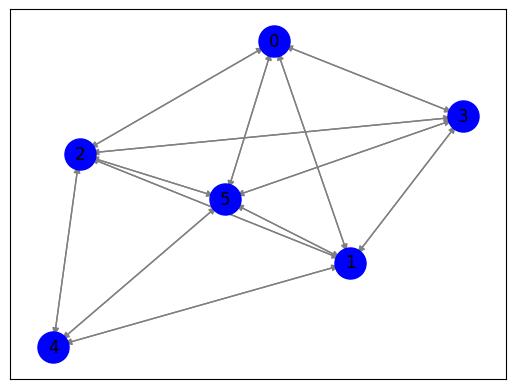

In [25]:
G = nx.DiGraph()
for i in range(len(cosine_similarities)):
    G.add_node(i)

for i in range(len(cosine_similarities)):
    for j in range(len(cosine_similarities)):
        similarity = cosine_similarities[i][j]
        if similarity > 0.02 and i != j:
            G.add_edge(i, j)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

## Langkah 6: Closeness Centrality

In [26]:
closeness_centrality = nx.closeness_centrality(G)

sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("\nSorted Closeness Centrality:")
for node, closeness in sorted_closeness:
    print(f"Node {node}: {closeness:.4f}")


Sorted Closeness Centrality:
Node 1: 1.0000
Node 2: 1.0000
Node 5: 1.0000
Node 0: 0.8333
Node 3: 0.8333
Node 4: 0.7143


In [27]:
print("\nNode Tertinggi dengan Kalimat:")
for node, closeness in sorted_closeness[:3]:
    top_sentence = kalimat[node]
    print(f"Node {node}: Closeness Centrality = {closeness:.4f}")
    print(f"Kalimat: {top_sentence}\n")


Node Tertinggi dengan Kalimat:
Node 1: Closeness Centrality = 1.0000
Kalimat: "Bersama-sama, kami merangkul semangat untuk perubahan perilaku sehari-hari melalui aksi nyata dalam sehari, demi masa depan yang lebih bersih," ungkap ESG Programme Leader OCS Group Indonesia Ricardo Purba.

Node 2: Closeness Centrality = 1.0000
Kalimat: Ricardo mengatakan inisiasi bersih-bersih merupakan program yang sejalan dengan Komitmen ESG (Economy, Social, and Governance).

Node 5: Closeness Centrality = 1.0000
Kalimat: Ricardo menambahkan pihaknya mengutamakan upaya-upaya waste management untuk memastikan bahwa sampah yang terkumpul akan diproses lebih lanjut.

